<a href="https://colab.research.google.com/github/sharvari-gote/Intro_to_Robotics/blob/main/Netflix_Movies_and_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Netflix Movies and TV Shows EDA**
This dataset consists of various columns:
1. show_id : Unique ID for every Movie / Tv Show
2. type : Identifier - A Movie or TV Show
3. title : Title of the Movie / Tv Show
4. director : Director of the Movie
5. cast : Actors involved in the movie / show
6. country : Country where the movie / show was produced
7. date_added : Date it was added on Netflix
8. release_year : Actual Release year of the move / show
9. rating : TV Rating of the movie / show
10. duration : Total Duration - in minutes or number of seasons



In [ ]:
# Install the required libraries

# opendatasets is a Python library for downloading datasets from online sources like Kaggle.

!pip install opendatasets --upgrade --quiet 


# Squarify is used in Pyhon to plot a Treemap.

!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Used to generate a wordcloud in Python.
! pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import the necessary modules.
import os 
import opendatasets as od # Used to import and download the dataset
import pandas as pd # Data manipulation and data analysis.
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Interactive visualization
import numpy as np # Scientific computing 
import warnings # To deal with warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import squarify
import scipy.stats as stats # Statistical scienific library.
import plotly.graph_objects as go
from collections import Counter #A Counter is a dict subclass for counting hashable objects.
import re # Package used with regulaar expressions
from wordcloud import WordCloud, STOPWORDS 
import plotly.figure_factory as ff

# **Loading the dataset**

In [ ]:
# Download the data set files
# Assign the Kaggle data set URL into variable

dataset = 'https://www.kaggle.com/datasets/shivamb/netflix-shows'

# Using opendatasets let's download the data sets

od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sharvarigote
Your Kaggle Key: ··········


100%|██████████| 1.34M/1.34M [00:00<00:00, 92.5MB/s]

In [ ]:
# List the files.

data_dir = './netflix-shows'

In [ ]:
# List of all files and directories in the specified directory.

os.listdir(data_dir)

['netflix_titles.csv']

In [ ]:
# All the required functions

def round_up(num):
  # Round the input upto 2 decimal places.
  return round(num, 2)

def first_country(country):
  # Return the first country from country list present in country column.
  return country.split(',')[0]

def duration(dur):
  # Returns duration of Movie as integer value.
  return int(dur[:-3])

def season(entry):
  # Returns no of seasons for each Tv Show as an integer value.
  return int(entry[:2].strip())

def number_of_directors_or_cast(test_str):
  # Return number directors or cast members. if data missing returns 0
  if test_str  == "No Data":
    return 0
  else:
    return len(re.findall(",", test_str)) + 1

# **Reading the data**

In [ ]:
df = pd.read_csv('netflix-shows/netflix_titles.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Missing Values.
null_values = df.isna().sum()/len(df)*100
null_values = null_values.apply(round_up)
null_values = null_values[null_values.values > 0]
for index, value in null_values.items():
  print("Percent of missing values for {} : {}%".format(index, value))

Percent of missing values for director : 29.91%
Percent of missing values for cast : 9.37%
Percent of missing values for country : 9.44%
Percent of missing values for date_added : 0.11%
Percent of missing values for rating : 0.05%
Percent of missing values for duration : 0.03%


###  In total 5 columns have missing values.


#**Data Cleaning**


## **Tackling the missing data**
*   Replace  the missing director values by "No Data".
*   Replace the missing cast values by "No Data".
*   Dropping rows with missing country values.




In [ ]:
#Replacing missing values

df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

# Dropping the NaN values.

df.dropna(inplace=True)

# Drop Duplicates

df.drop_duplicates(inplace= True)

df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7961 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7961 non-null   object
 1   type          7961 non-null   object
 2   title         7961 non-null   object
 3   director      7961 non-null   object
 4   cast          7961 non-null   object
 5   country       7961 non-null   object
 6   date_added    7961 non-null   object
 7   release_year  7961 non-null   int64 
 8   rating        7961 non-null   object
 9   duration      7961 non-null   object
 10  listed_in     7961 non-null   object
 11  description   7961 non-null   object
dtypes: int64(1), object(11)
memory usage: 808.5+ KB


## To deal with date column 
*   We convert the date_added column to datetime object
and 3 calculated fields:
1.   month(number)_added : Month it was added on Netflix.
2.   month(name)_added : Name of the month it was added on Netflix.
3.   year_added : Year it was added on Netflix.





In [ ]:
# Adding the month and year when movie/ tv show was added on Netflix.

df["date_added"] = pd.to_datetime(df['date_added'])
df['month(number)_added']=df['date_added'].dt.month
df['month(name)_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year
df = df.reset_index(drop = True)
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month(number)_added,month(name)_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,September,2021
4,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,September,2021


# **Visualize the data**

# **Let's take a look at Type and its distribution**

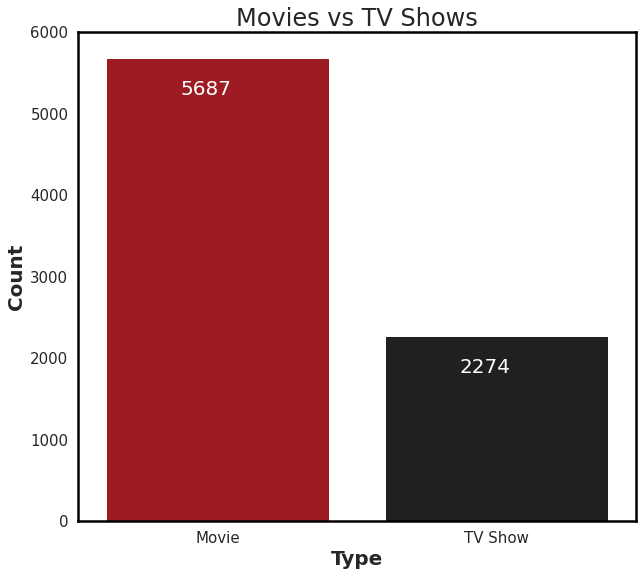

In [ ]:
# Count plot of Movies and TV Shows.

sns.set(rc={"figure.figsize":(10, 9)})
sns.set_style("whitegrid")

# Count plot of Movies and TV Shows.

ax = sns.countplot(x = 'type', data = df, palette = ["#b20710", "#221f1f"])
plt.ylim(0, 6000) 
sns.set(font_scale = 2)

# Set labels for x and y axes.

plt.xlabel("Type", fontsize = 20, weight = 'bold')
plt.ylabel("Count", fontsize= 20, weight = 'bold')

# Set font size of x and y values.

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.title("Movies vs TV Shows")
plt.grid(False)

# Annotations on the graph.

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.36, p.get_height()), ha='center', va='top', color='white', size = 20)

# Plot boundaries around the plot.

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_linewidth(2.5)
    ax.spines[s].set_color("black")
plt.show()

In [ ]:
#Ratio of Movies to TV shows.

x = df.groupby(['type'])['type'].count()/len(df['type'])
mtv_ratio = pd.DataFrame(x).T.apply(round_up)
mtv_ratio


type,Movie,TV Show
type,0.71,0.29


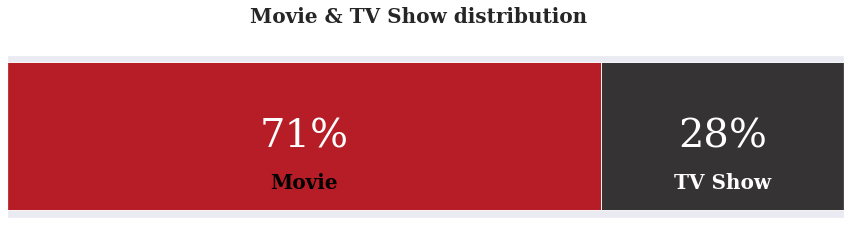

In [ ]:
# Percentage bar graph of Ratio of Movies to TV Shows.

fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(1, 1, 1)

# Horizontal bar graph.

ax.barh(mtv_ratio.index, mtv_ratio['Movie'], 
        color='#b20710', alpha=0.9)
ax.barh(mtv_ratio.index, mtv_ratio['TV Show'], left = mtv_ratio['Movie'], 
        color='#221f1f', alpha=0.9)

# Setting the limits of x-axis.

ax.set_xlim(0, 1)

# Disables the ticks for x and y axis.

ax.set_xticks([])
ax.set_yticks([])

# Annotations on the graph.

for i in mtv_ratio.index:
    ax.annotate(f"{int(mtv_ratio['Movie'][i]*100)}%", 
                   xy=(mtv_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Movie", 
                   xy=(mtv_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize = 20, fontweight='bold', fontfamily='serif',
                   color='black')
    
    
for i in mtv_ratio.index:
    ax.annotate(f"{int(mtv_ratio['TV Show'][i]*100)}%", 
                   xy=(mtv_ratio['Movie'][i]+mtv_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show", 
                   xy=(mtv_ratio['Movie'][i]+mtv_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize= 20, fontweight='bold', fontfamily='serif',
                   color='white')


# Title & Subtitle

fig.text(0.35, 1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize = 20, fontweight='bold')

# Removing legend due to labelled plot

ax.legend().set_visible(False)
plt.show()

## **Observations about *Type* column**:
* #### We observe that **Movies** are more extensively present on Netflix than TV Shows.
* #### 71% of data is  related to **Movies** while 29% is related to **TV Shows**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7961 entries, 0 to 7960
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   show_id              7961 non-null   object        
 1   type                 7961 non-null   object        
 2   title                7961 non-null   object        
 3   director             7961 non-null   object        
 4   cast                 7961 non-null   object        
 5   country              7961 non-null   object        
 6   date_added           7961 non-null   datetime64[ns]
 7   release_year         7961 non-null   int64         
 8   rating               7961 non-null   object        
 9   duration             7961 non-null   object        
 10  listed_in            7961 non-null   object        
 11  description          7961 non-null   object        
 12  month(number)_added  7961 non-null   int64         
 13  month(name)_added    7961 non-nul

# **Analysis by country**

* ####  For each entry a list of countries have been given to make the data more reliable for analysis, I assumed that the first country is the list.


In [ ]:
df['country'].head(5)

0                                        United States
1                                         South Africa
2                                                India
3    United States, Ghana, Burkina Faso, United Kin...
4                                       United Kingdom
Name: country, dtype: object

In [ ]:
# Extracting the first country for each entry.

df['country'] = df['country'].apply(first_country)
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month(number)_added,month(name)_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,September,2021
4,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,September,2021


In [ ]:
# Reducing name length

df.replace({'country' : {'United States' : 'USA', 'United Kingdom': 'UK',  'South Korea' : 'S. Korea', "India" : "IN"}}, inplace = True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month(number)_added,month(name)_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,USA,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",IN,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",USA,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,September,2021
4,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",UK,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,September,2021


## **Analysis of Top 10 countries on Netflix**



In [ ]:
# Dataframe of top 10 countries on Netflix.
country_top_10 = df['country'].value_counts().head(10)
country_top_10.index

Index(['USA', 'IN', 'UK', 'Canada', 'Japan', 'France', 'S. Korea', 'Spain',
       'Mexico', 'Australia'],
      dtype='object')

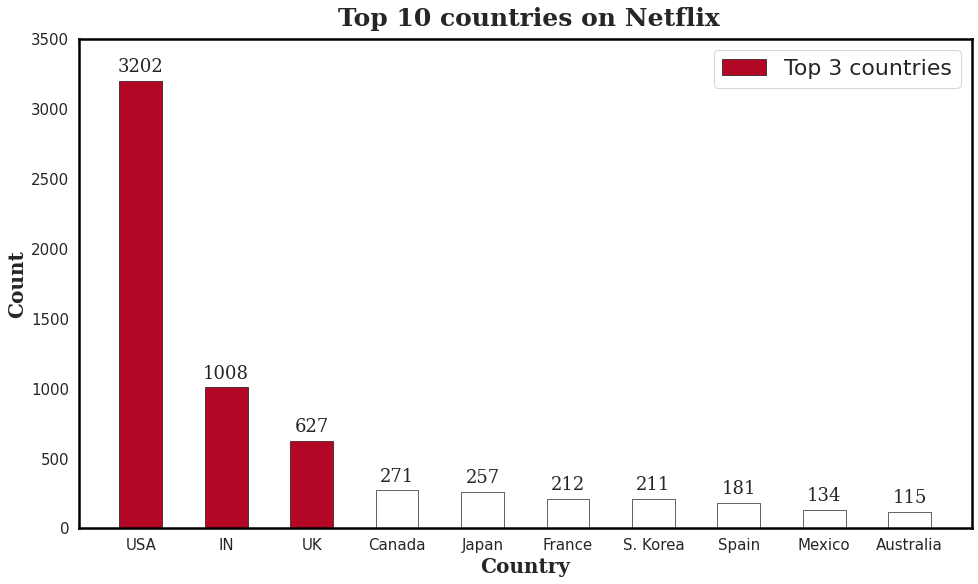

In [ ]:
# Plotting bar plot the top 10 countries on Neflix.

color_map = ['white' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20725' # color highlight


fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)

# Bar plot of content for top 10 countries.

ax.bar(country_top_10.index, country_top_10, width=0.5, 
       edgecolor='black',
       linewidth=0.6, color = color_map)


# Annotations on the graph.

for i in country_top_10.index:
    ax.annotate(f"{country_top_10[i]}", 
                   xy=(i, country_top_10[i] + 100), 
                   va = 'center', ha='center',fontweight='medium', fontfamily='serif', fontsize = 18)
ax.set_facecolor("white")   

# Tick labels

ax.set_xticklabels(country_top_10.index, rotation = 0,  fontsize = 250)

# Title and sub-title

fig.text(0.35, .90, 'Top 10 countries on Netflix', fontsize = 25, fontweight='bold', fontfamily='serif')
 
grid_y_ticks = np.arange(0, 4000, 500) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

# Axis labels and lenged.

plt.xlabel("Country", fontsize = 20, fontweight='heavy', fontfamily='serif',y=-1.5)
plt.ylabel("Count", fontsize = 20, fontweight='heavy', fontfamily='serif')
plt.legend(["Top 3 countries"], loc='upper right', facecolor='white')


# Changing appearance of tick labels.

ax.tick_params(axis='both', which='major', labelsize = 15)
ax.grid(False)

# Plot boundaries around the plot.

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_linewidth(2.5)
    ax.spines[s].set_color("black")

plt.show()

## **Observations** :
### The **top 3 countries** on Netflix are:
1.   **USA**
2.   **IN**
3.   **UK** 







In [ ]:
country_top_10.index

Index(['USA', 'IN', 'UK', 'Canada', 'Japan', 'France', 'S. Korea', 'Spain',
       'Mexico', 'Australia'],
      dtype='object')

In [ ]:
# Ratio of Movie to TV Shows for top 10 countries on Netflix.
country_top_10.index
country_top_10_ratio = df[["type", "country"]].groupby('country')['type'].value_counts().loc[country_top_10.index].unstack()
country_top_10_ratio['total'] = country_top_10_ratio.sum(axis = 1) 
country_top_10_ratio['Movie'] = country_top_10_ratio['Movie']/country_top_10_ratio['total']
country_top_10_ratio['TV Show'] = country_top_10_ratio['TV Show']/country_top_10_ratio['total']
country_top_10_ratio = country_top_10_ratio[['Movie', 'TV Show']].apply(round_up).sort_values(by='Movie',ascending=True)
country_top_10_ratio


type,Movie,TV Show
country,,
S. Korea,0.22,0.78
Japan,0.33,0.67
Australia,0.53,0.47
UK,0.61,0.39
Mexico,0.64,0.36
Canada,0.69,0.31
France,0.70,0.30
Spain,0.71,0.29
USA,0.74,0.26


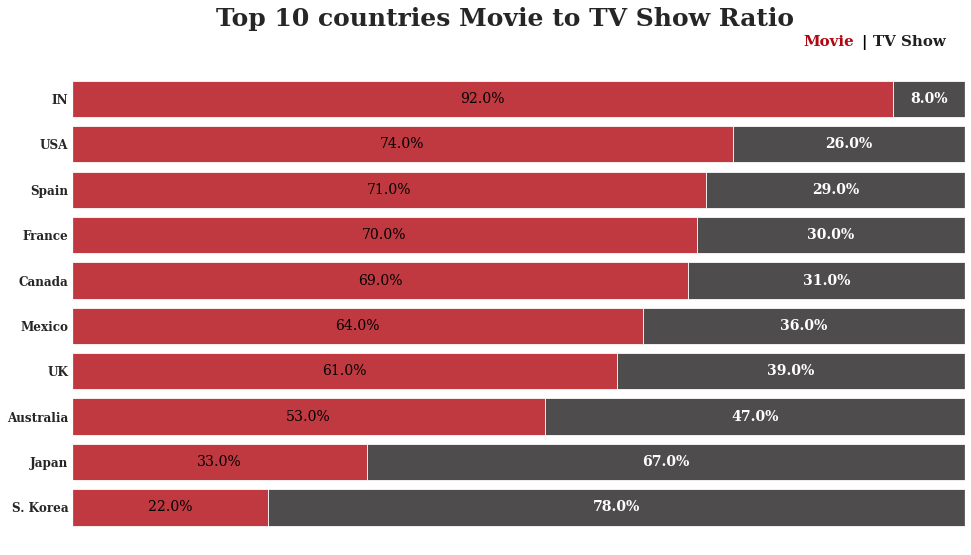

In [ ]:
# Plotting percent stacked horizontal bar graph.

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)


# Percentage bar grapg for top 10 countries

ax.barh(country_top_10_ratio.index, country_top_10_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(country_top_10_ratio.index, country_top_10_ratio['TV Show'], left=country_top_10_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='TV Show')

# Tick Labels.

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(country_top_10_ratio.index, fontfamily='serif', fontsize=11, fontweight = 'heavy')

# Annotations on the graph.
for i in country_top_10_ratio.index:
    ax.annotate(f"{country_top_10_ratio['Movie'][i]*100:.3}%", 
                   xy=(country_top_10_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=14, fontweight='light', fontfamily='serif',
                   color='black')

for i in country_top_10_ratio.index:
    ax.annotate(f"{country_top_10_ratio['TV Show'][i]*100:.3}%", 
                   xy=(country_top_10_ratio['Movie'][i]+country_top_10_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=14, fontweight='heavy', fontfamily='serif',
                   color='white')
    

# Text on the graph.
fig.text(0.25, 0.93, 'Top 10 countries Movie to TV Show Ratio', fontsize = 25, fontweight='bold', fontfamily='serif')   
fig.text(0.76,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


# Changing appearance of tick labels.
ax.set_facecolor("white")
ax.tick_params(axis=u'both', which=u'both',length=0, labelsize=12)

plt.show()

## **Observations**:
* As we see that for **India** movies are more dominant due to presence of Bollywood and over the years the Bollywood movies have been opting for OTT release too.

* While for **South Korea**, is famous for K-dramas(Korean dramas).

# **Analysis by Rating**
### There 14 types of unique rating present for Netflix.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7961 entries, 0 to 7960
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   show_id              7961 non-null   object        
 1   type                 7961 non-null   object        
 2   title                7961 non-null   object        
 3   director             7961 non-null   object        
 4   cast                 7961 non-null   object        
 5   country              7961 non-null   object        
 6   date_added           7961 non-null   datetime64[ns]
 7   release_year         7961 non-null   int64         
 8   rating               7961 non-null   object        
 9   duration             7961 non-null   object        
 10  listed_in            7961 non-null   object        
 11  description          7961 non-null   object        
 12  month(number)_added  7961 non-null   int64         
 13  month(name)_added    7961 non-nul

In [ ]:
# The first 5 rows of the dataset.
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month(number)_added,month(name)_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,USA,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",IN,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",USA,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,September,2021
4,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",UK,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,September,2021


In [ ]:
df['rating'].nunique()

14

In [ ]:
# Dataframe of ratings and the frequency.
rate_mov_tv = pd.DataFrame(df.groupby(['rating'])['type'].count().sort_values(ascending=False).reset_index())
rate_mov_tv.rename(columns = {'type' : "count"}, inplace = True)
rate_mov_tv

,rating,count
0,TV-MA,2929
1,TV-14,1927
2,R,788
3,TV-PG,771
4,PG-13,482
5,PG,281
6,TV-Y7,235
7,TV-Y,227
8,TV-G,190
9,NR,79


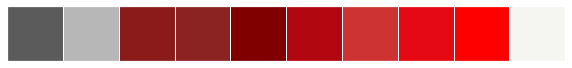

In [ ]:
# The pallete used for treemap.

sns.palplot(['#5B5B5B','#B7B7B7','#8B1A1A','#8B2323', '#800000', '#b20710','#CD3333', '#e50914','#FF0000','#f5f5f1'])

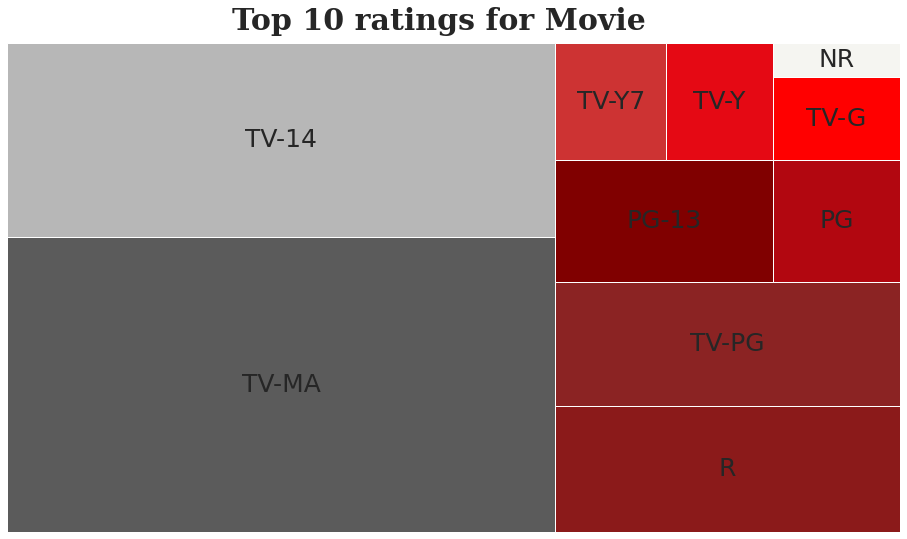

In [ ]:
# Tree map of top 10 highest ratings.

fig = plt.figure(figsize=(16, 9))

# set seaborn plot style

sns.set_style(style="whitegrid") 

# proportions of the categories

sizes= rate_mov_tv[:10]['count']
label=rate_mov_tv[:10]['rating']
colors = ['#5B5B5B','#B7B7B7','#8B1A1A','#8B2323', '#800000', '#b20710','#CD3333', '#e50914','#FF0000','#f5f5f1']

# Treemap 
squarify.plot(sizes=sizes, label=label, alpha= 1, color = colors, text_kwargs={'fontsize': 25, 'weight' :'light'})
fig.text(0.32, .9, 'Top 10 ratings for Movie', fontsize = 30, fontweight='bold', fontfamily='serif')

plt.axis('off')


plt.show()



In [ ]:
# Count of Movies and TV Shows for top 10 ratings.
ratings = df.groupby(['type'])['rating'].value_counts().unstack().T.fillna(0).astype(int)
ratings.sort_values(by = ['Movie'], ascending = False, inplace = True)
ratings = ratings.T
ratings

rating,TV-MA,TV-14,R,TV-PG,PG-13,PG,TV-G,TV-Y,TV-Y7,NR,G,TV-Y7-FV,NC-17,UR
type,,,,,,,,,,,,,,
Movie,1924,1307,787,504,482,281,109,84,83,75,41,4,3,3
TV Show,1005,620,1,267,0,0,81,143,152,4,0,1,0,0


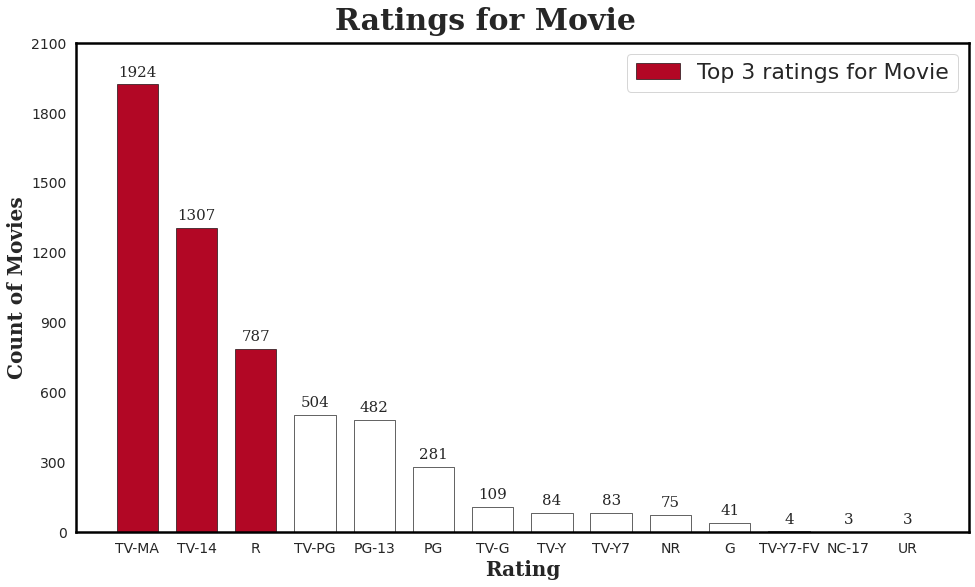

In [ ]:
# Plotting bar chart for frequency of movies for top 10 ratings.

rat_movies = ratings.loc['Movie']
color_map = ['white' for _ in range(12)]
color_map[0] = color_map[1] = color_map[2] =  '#b20725' # color highlight


fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)

# Bar graph of frequency for top 10 ratings.

ax.bar(rat_movies.index, rat_movies, width=0.7, 
       edgecolor='black',
       linewidth=0.6, color = color_map)

# Annotations for the graph.

for i in rat_movies.index:
    ax.annotate(f"{rat_movies[i]}", 
                   xy=(i, rat_movies[i] + 50), 
                   va = 'center', ha='center',fontweight='medium', fontfamily='serif', fontsize = 15)
ax.set_facecolor("white")   

# Tick labels

ax.set_xticklabels(rat_movies.index, rotation = 0,  fontsize = 2)


# Title and sub-title

fig.text(0.35, .9, 'Ratings for Movie', fontsize = 30, fontweight='bold', fontfamily='serif')

 
grid_y_ticks = np.arange(0, 2200, 300) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

# Axis labels

plt.xlabel("Rating", fontsize = 20, fontweight='heavy', fontfamily='serif',y=-1.5)
plt.ylabel("Count of Movies", fontsize = 20, fontweight='heavy', fontfamily='serif')
plt.legend(["Top 3 ratings for Movie"], loc='upper right')

# Changing appearance of tick labels.

ax.tick_params(axis='both', which='major', labelsize = 14)
ax.grid(False)


# Plot boundaries around the plot
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_linewidth(2.5)
    ax.spines[s].set_color("black")

plt.show()

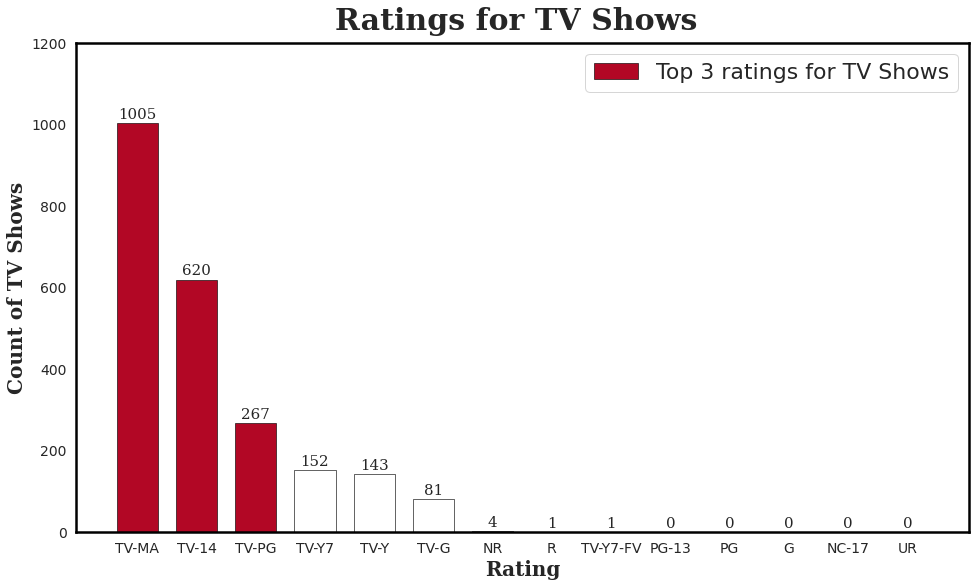

In [ ]:
# Plotting bar chart for frequency of TV Shows for each rating.

rat_tv_show = ratings.loc['TV Show'].sort_values(ascending = False)
color_map = ['white' for _ in range(12)]
color_map[0] = color_map[1] = color_map[2] =  '#b20725' # color highlight


fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)

ax.bar(rat_tv_show.index, rat_tv_show, width=0.7, 
       edgecolor='black',
       linewidth=0.6, color = color_map)

# Annotations for the graph.

for i in rat_tv_show.index:
    ax.annotate(f"{rat_tv_show[i]}", 
                   xy=(i, rat_tv_show[i] + 20), 
                   va = 'center', ha='center',fontweight='medium', fontfamily='serif', fontsize = 15)
ax.set_facecolor("white")   

# Tick labels

ax.set_xticklabels(rat_tv_show.index, rotation = 0,  fontsize = 2)

# Title and sub-title

fig.text(0.35, .9, 'Ratings for TV Shows', fontsize = 30, fontweight='bold', fontfamily='serif')

 
grid_y_ticks = np.arange(0, 1300, 200) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

plt.xlabel("Rating", fontsize = 20, fontweight='heavy', fontfamily='serif', y = 1)
plt.ylabel("Count of TV Shows", fontsize = 20, fontweight='heavy', fontfamily='serif')
plt.legend(["Top 3 ratings for TV Shows"], loc='upper right')

    

# Changing appearance of tick labels.

ax.tick_params(axis='both', which='major', labelsize = 14)
ax.grid(False)

# Plot boundaries around the plot

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_linewidth(2.5)
    ax.spines[s].set_color("black")

plt.show()

In [ ]:
rat_tv_show_2 = -ratings.loc['TV Show']
rat_tv_show_2

rating
TV-MA      -1005
TV-14       -620
R             -1
TV-PG       -267
PG-13          0
PG             0
TV-G         -81
TV-Y        -143
TV-Y7       -152
NR            -4
G              0
TV-Y7-FV      -1
NC-17          0
UR             0
Name: TV Show, dtype: int64

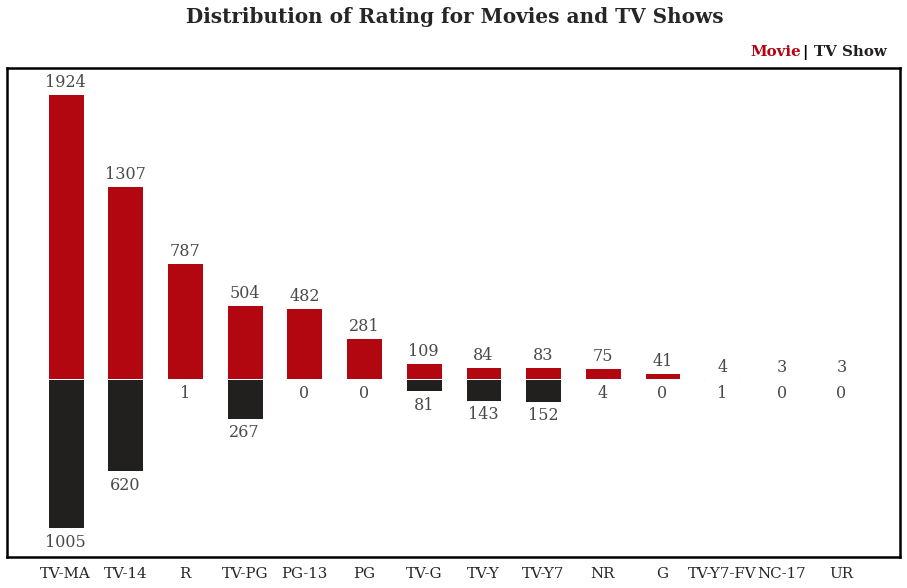

In [ ]:
# Distribution of Rating for Movies and TV Shows
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)

# Bar plots for Movie and TV Shows for each rating.
ax.bar(rat_movies.index, rat_movies, width=0.6, color='#b20710', alpha = 1, label='Movie')
ax.bar(rat_tv_show_2.index, rat_tv_show_2, width=0.6, color='#221f1f', alpha=1, label='TV Show')
ax.grid(False)


ax.set_ylim(-1200, 2100)
ax.set_facecolor("white") 

# Annotations for the graph.

for i in rat_movies.index:
    ax.annotate(f"{rat_movies[i]}", 
                   xy=(i, rat_movies[i] + 80),
                   va = 'center', ha='center',fontweight='medium', fontfamily='serif', fontsize = 16,
                   color='#4a4a4a')  

for i in rat_tv_show_2.index:
    ax.annotate(f"{-rat_tv_show_2[i]}", 
                   xy=(i, rat_tv_show_2[i] - 90),
                   va = 'center', ha='center',fontweight='medium', fontfamily='serif', fontsize = 16,
                   color='#4a4a4a')  

# Changing appearance of tick labels.

ax.set_xticklabels(ratings.columns, fontfamily='serif', fontsize = 15)
ax.set_yticks([])    

# Title and sub-title

ax.legend().set_visible(False)
fig.text(.28, .95, 'Distribution of Rating for Movies and TV Shows', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.77,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.815,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

# Plot boundaries around the plot

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_linewidth(2.5)
    ax.spines[s].set_color("black")


plt.show()

## **Observations** :
### Top 3  for **Movie** ratings are:
* **TV_MA**
* **TV-14**
* **R**

### Top 3  for **TV Shows** ratings are:
* **TV_MA**
* **TV-14**
* **TV-PG**

### While few ratings have no TV Shows.


## **Analysis about the content added over the years**

In [ ]:
# DataFrame of content added on Netflix over the years.
year_mov_tv = df.groupby(by = 'year_added')['type'].value_counts().unstack().fillna(0).astype('int')
swap_col = ['TV Show', "Movie"]
year_mov_tv = year_mov_tv.reindex(columns = swap_col)
year_mov_tv

type,TV Show,Movie
year_added,,
2008,1,1
2009,0,2
2010,0,1
2011,0,13
2012,0,3
2013,5,6
2014,5,19
2015,25,54
2016,165,242


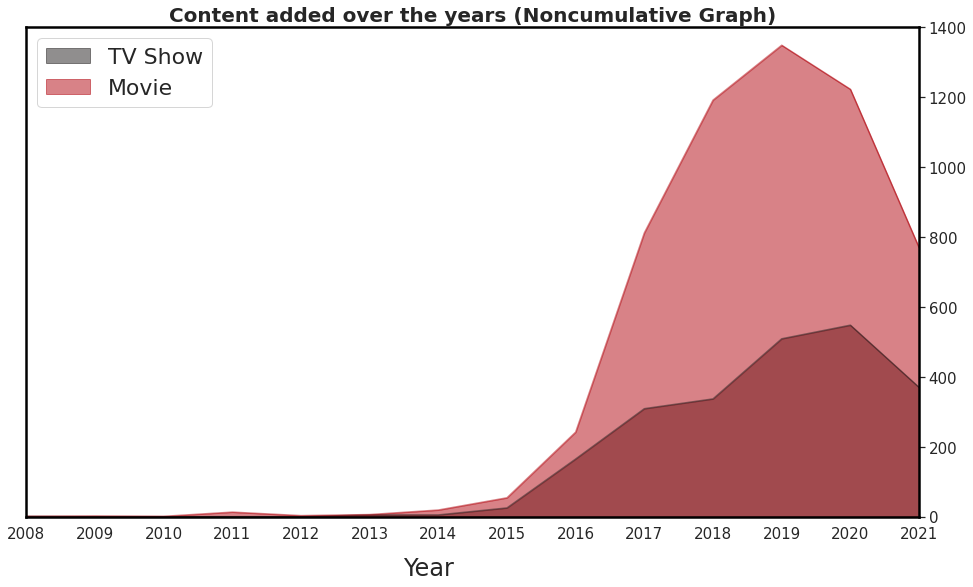

In [ ]:
# Non-Cumulative Area plot of Content added on Neflix over the years.

color = ['#221f1f', "#b20710"]

# Area Plot
ax = year_mov_tv.plot.area(stacked = False, color = ['#221f1f', "#b20710"], grid = False, figsize=(16, 9), use_index = True, legend = False, fontsize = 10, xlabel = "Year")
ax.yaxis.tick_right()


# Grid and x and y axis limits.
ax.grid(False)
ax.xaxis.set_label_coords(.45,-.08)
ax.set_xlim(2008,2021)
ax.set_ylim(0,1400,200)

# Tick labels and parameters.

plt.xticks(np.arange(2008, 2022, 1))
plt.tick_params(axis=u'both', which=u'both', labelsize=15)

# Plot boundaries around the plot

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_linewidth(2.5)
    ax.spines[s].set_color("black")

# Graph title.
ax.set_title('Content added over the years (Noncumulative Graph)',
             fontsize = 20, fontweight ='bold')  


plt.legend()
plt.show()


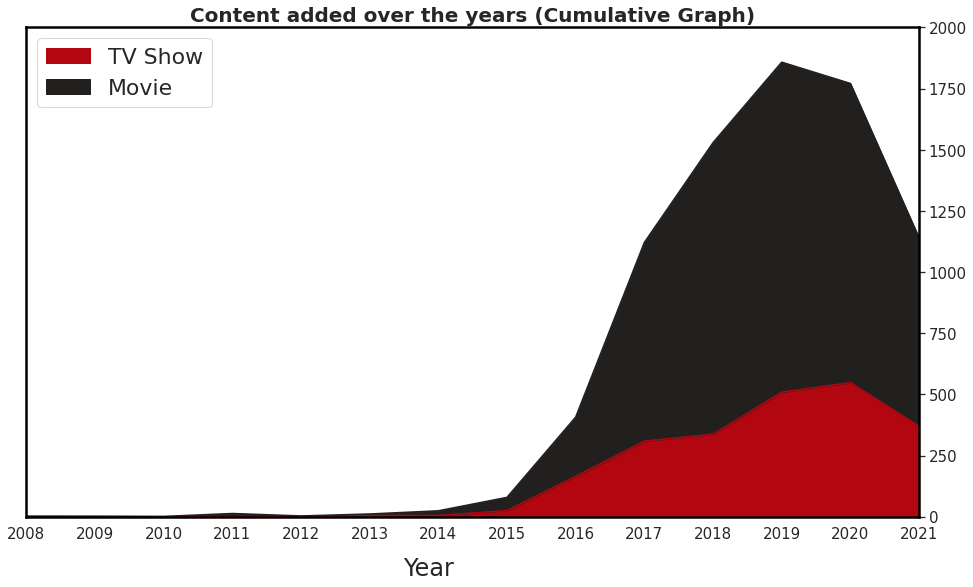

In [ ]:
# Cumulative Area plot of Content added on Neflix over the years.

color = ["#b20710", "#221f1f"]

# Area Plot

ax = year_mov_tv.plot.area(stacked = True, color = color, grid = False, figsize=(16, 9), use_index = True, legend = True, fontsize = 12, xlabel = "Year")


# Tick labels and parameters.

ax.yaxis.tick_right()
ax.xaxis.set_label_coords(.45,-.08)

# Grid and x and y axis limits.

ax.grid(False)
ax.set_xlim(2008,2021)
ax.set_ylim(0,2000,200)
plt.xticks(np.arange(2008, 2022, 1))
plt.tick_params(axis=u'both', which=u'both', labelsize=15)

# Plot boundaries around the plot

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_linewidth(2.5)
    ax.spines[s].set_color("black")

# Graph title.

ax.set_title('Content added over the years (Cumulative Graph)',
             fontsize = 20, fontweight ='bold')  


plt.legend()
plt.show()

# **Observations**
* There has been peak over the content added on Netflix from **2019 to 2021 this can be due to COVID as more people stayed at home and opted for OTT platform for entertainment.** 

# **Analysis about the content added over the months**

In [ ]:
# Convert the month(name)_added to a categorical value.
month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

df['month(name)_added'] = pd.Categorical(df['month(name)_added'], categories=month_order, ordered=True)


In [ ]:
# DataFrame of content added over the months.

month_mov_tv = df.groupby('month(name)_added')['type'].value_counts().unstack()
month_mov_tv

type,Movie,TV Show
month(name)_added,,
January,527,174
February,372,168
March,502,183
April,511,182
May,392,153
June,443,190
July,490,218
August,471,195
September,460,200


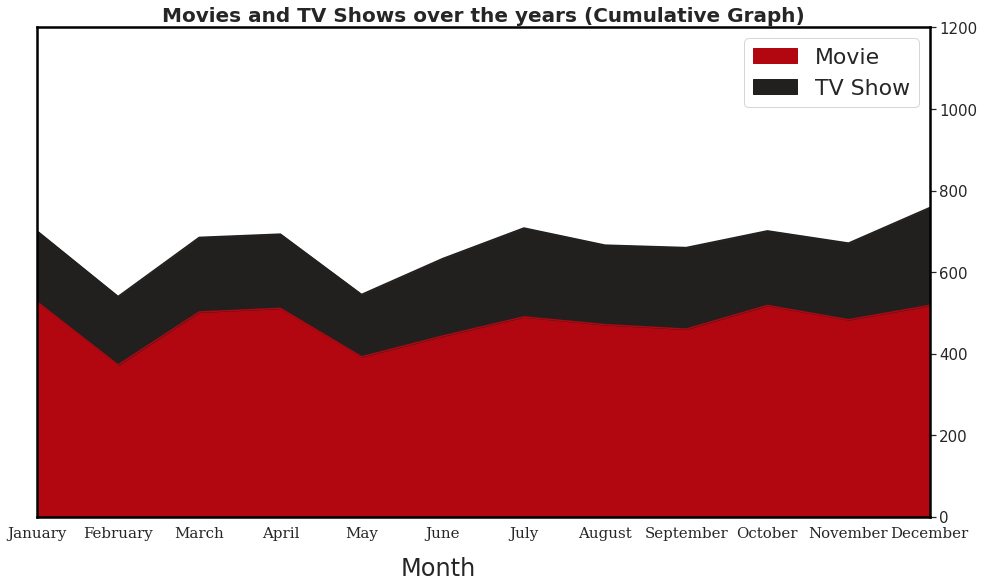

In [ ]:
# Cumulative Area plot of Content added on Neflix over the months.

color = ["#b20710", "#221f1f"]

# Area Plot

ax = month_mov_tv.plot.area(stacked = True, color = color, grid = False, figsize=(16, 9), use_index = True, legend = True, fontsize = 12, xlabel = "Month")

# Grid and x and y axis limits.


ax.xaxis.set_label_coords(.45,-.08)
ax.set_ylim(0,1200,200)
ax.margins(x=0)

# Tick labels and parameters.

ax.yaxis.tick_right()
ax.set_xticks(np.arange(len(month_mov_tv.index)))
ax.set_xticklabels(labels = month_mov_tv.index, fontfamily='serif', rotation=0, fontsize = 15)  


plt.tick_params(axis=u'both', which=u'both', labelsize=15)


# Plot boundaries around the plot

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_linewidth(2.5)
    ax.spines[s].set_color("black")

# Graph title.

ax.set_title('Movies and TV Shows over the years (Cumulative Graph)',
             fontsize = 20, fontweight ='bold')


plt.legend()
plt.show()

In [ ]:
# Total content per month

month_mov_tv_cum = month_mov_tv
month_mov_tv_cum['Value'] = month_mov_tv['Movie'] + month_mov_tv['TV Show']


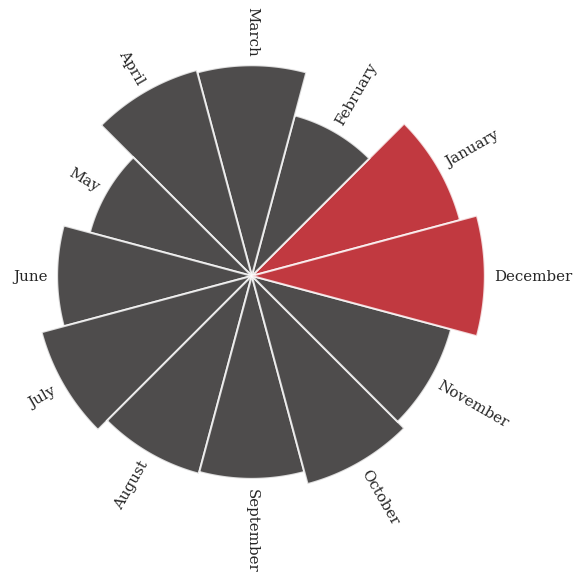

In [ ]:
color_map = ['#221f1f' for _ in range(12)]
color_map[0] = color_map[11] =  '#b20710' # color highlight
# initialize the figure

ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 30
lowerLimit = 1
labelPadding = 30

# Compute max and min in the dataset
max = month_mov_tv_cum['Value'].max()



# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * month_mov_tv_cum.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(month_mov_tv_cum.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(month_mov_tv_cum.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color=color_map,alpha=0.8
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, month_mov_tv_cum.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, fontsize=15,fontfamily='serif',
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

# **Observations**
* The most content is added on the month of **December and January, this , may be due to the holiday seaseon during that months.** 

## **Oldest Movies and TV Shows available on Netflix**

In [ ]:
# The oldest Movies on Neflix
old_movies = df.sort_values(by = 'release_year', ascending = True)
old_movies = old_movies[old_movies['type'] == 'Movie']
old_movies = old_movies[['title', 'release_year']]
old_movies[:10]

,title,release_year
6986,Prelude to War,1942
7384,The Battle of Midway,1942
7821,Undercover: How to Operate Behind Enemy Lines,1943
7897,Why We Fight: The Battle of Russia,1943
7920,WWII: Report from the Aleutians,1943
7590,The Memphis Belle: A Story of a\nFlying Fortress,1944
7801,Tunisian Victory,1944
7606,The Negro Soldier,1944
6462,Know Your Enemy - Japan,1945
6781,Nazi Concentration Camps,1945


In [ ]:
# The oldest TV Shows on Neflix
old_tv_show = df.sort_values(by = 'release_year', ascending = True)
old_tv_show = old_tv_show[old_tv_show['type'] == 'TV Show']
old_tv_show = old_tv_show[['title', 'release_year']]
old_tv_show[:10]

,title,release_year
979,Five Came Back: The Reference Films,1945
6943,Pioneers of African-American Cinema,1946
7709,The Twilight Zone (Original Series),1963
7369,The Andy Griffith Show,1967
3950,Monty Python's Fliegender Zirkus,1972
3951,Monty Python's Flying Circus,1974
5828,Dad's Army,1977
5949,El Chavo,1979
6793,Ninja Hattori,1981
7066,Robotech,1985


## **Distribution of Movie Duration**

In [ ]:
movie_df = df[df['type'] == 'Movie'].reset_index(drop = True)
movie_df['duration'] = movie_df['duration'].apply(duration)


In [ ]:
movie_df.isnull().sum()

show_id                0
type                   0
title                  0
director               0
cast                   0
country                0
date_added             0
release_year           0
rating                 0
duration               0
listed_in              0
description            0
month(number)_added    0
month(name)_added      0
year_added             0
dtype: int64

In [ ]:
# Distribution of Movie Duration.

x = movie_df['duration'].fillna(0.0).astype(float)
rug_text = [x]

# Distribution plot 

fig = ff.create_distplot([x], ['a'] , bin_size = 1, curve_type='normal', colors=["#b20710"], show_hist = False, show_rug = False)

# Layout of figure.

fig.update_layout(title_text = "Distribution of Movie Duration", title_x = .5, title_font_size = 28, title_xanchor = "center", title_yanchor = 'middle' ,  plot_bgcolor='rgba(0,0,0,0)', showlegend = False ,shapes=[go.layout.Shape(
type='rect', xref='paper', yref='paper', x0=0, y0=0, x1=1, y1=1., line={'width': 1, 'color': 'black'})])

# Change grid color and axis colors

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor= 'white')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor= 'white')

fig.show()


In [ ]:
print("{} longest movie on Neflix of {} mins".format(movie_df[movie_df['duration'] == movie_df['duration'].max()]['title'].values[0], movie_df[movie_df['duration'] == movie_df['duration'].max()]['duration'].values[0]))
print("{} shortest movie on Neflix of {} mins".format(movie_df[movie_df['duration'] == movie_df['duration'].min()]['title'].values[0], movie_df[movie_df['duration'] == movie_df['duration'].min()]['duration'].values[0]))

Black Mirror: Bandersnatch longest movie on Neflix of 312 mins
Silent shortest movie on Neflix of 3 mins


# **Observations**
* When the duration of Movie as a normal distribution we see the mean of the graph is around **100 mins**.
* Most of the movies have the duration of **50 to 150 mins.**
* We also obtain the shortest and longest movie on Netflix.

##**Distribution by TV Shows Seasons**

In [ ]:
# Extracting the number of seasons for each TV Show.
tv_df = df[df['type'] == 'TV Show'].reset_index(drop = True)
tv_df['duration'] = tv_df['duration'].apply(season)
tv_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month(number)_added,month(name)_added,year_added
0,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
1,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",IN,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021
2,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",UK,2021-09-24,2021,TV-14,9,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,September,2021
3,s16,TV Show,Dear White People,No Data,"Logan Browning, Brandon P. Bell, DeRon Horton,...",USA,2021-09-22,2021,TV-MA,4,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,9,September,2021
4,s18,TV Show,Falsa identidad,No Data,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,2021-09-22,2020,TV-MA,2,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...,9,September,2021


In [ ]:
# Dataframe of frequency of TV Shows.

tv_season = tv_df.groupby('duration')['type'].value_counts().unstack()
tv_season.loc['16'] = [0]
tv_season.loc['14'] = [0]
tv_season= tv_season.reset_index()
tv_season['duration'] = tv_season['duration'].astype('int64')
tv_season.sort_values(by = 'duration', inplace = True)

tv_season.set_index('duration', inplace = True)
tv_season

type,TV Show
duration,
1,1456
2,383
3,187
4,92
5,63
6,33
7,22
8,16
9,8


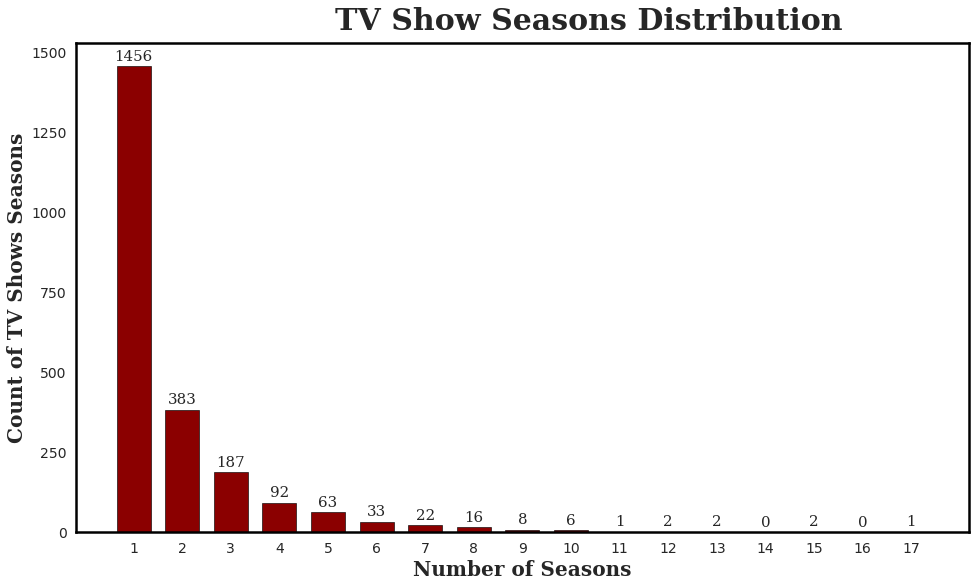

In [ ]:
# Plotting bar chart for frequency of TV Shows Seasons.

color_map = ['darkred' for _ in range(len(tv_season))]



fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)

ax.bar(tv_season.index, tv_season['TV Show'], width=0.7, 
       edgecolor='black',
       linewidth=0.6, color = color_map)

# Annotations for the graph.

for i in tv_season.index:
    ax.annotate(f"{tv_season['TV Show'][i]}", 
                   xy=(i, tv_season['TV Show'][i] + 30), 
                   va = 'center', ha='center',fontweight='medium', fontfamily='serif', fontsize = 15)
ax.set_facecolor("white")   

# Tick labels

ax.set_xticklabels(tv_season.index, rotation = 0,  fontsize = 2)

# Title and sub-title

fig.text(0.35, .9, 'TV Show Seasons Distribution', fontsize = 30, fontweight='bold', fontfamily='serif')

 
grid_y_ticks = np.arange(0, 1550, 250) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
grid_x_ticks = np.arange(1,18, 1) # y ticks, min, max, then step
ax.set_xticks(grid_x_ticks)
ax.set_axisbelow(True)

#Axis labels

plt.xlabel("Number of Seasons", fontsize = 20, fontweight='heavy', fontfamily='serif', y = 1)
plt.ylabel("Count of TV Shows Seasons", fontsize = 20, fontweight='heavy', fontfamily='serif')


    

#Changing appearance of tick labels.

ax.tick_params(axis='both', which='major', labelsize = 14)
ax.grid(False)

# Plot boundaries around the plot

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_linewidth(2.5)
    ax.spines[s].set_color("black")

plt.show()

In [ ]:
print("The longest running TV Show on Neflix is : {}".format(tv_df[tv_df['duration'] == tv_df['duration'].max()]['title'].values[0]))

The longest running TV Show on Neflix is : Grey's Anatomy


# **Observations**
* Most TV Shows have **one season**.
* The longest running TV Show on Neflix is : Grey's Anatomy.

# **Analysis about the categories**

In [ ]:
#Top 20 Categories for Netflix
categories = ','.join(df['listed_in']).split(",")
counter_list = Counter(categories).most_common(20)
names = [i[0].strip() for i in counter_list]
val = [i[1] for i in counter_list]


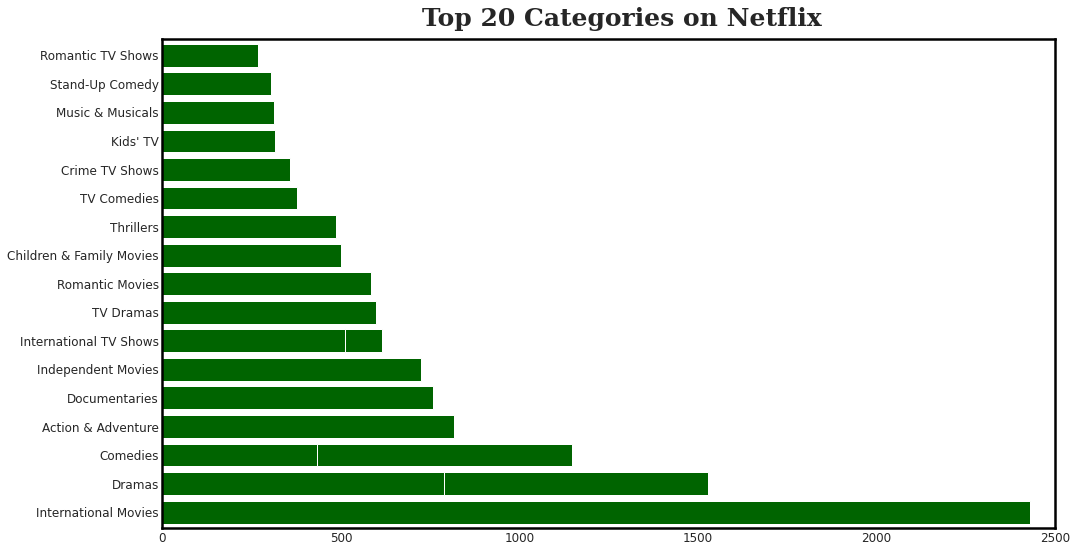

In [ ]:
# Horizontal bar plot of Top 20 Categories on Netflix

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)

# Horizontal bar plot

ax.barh(names, val, 
        color='darkgreen', alpha = 1, label='Movie')

# Title label

fig.text(0.35, 0.9, 'Top 20 Categories on Netflix', fontsize = 25, fontweight='bold', fontfamily='serif')   

# Axis display settings

ax.set_facecolor("white")
ax.set_xlim(0,2500)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.margins(x=0, y = 0.01)
 
# Plot boundaries around the plot

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_linewidth(2.5)
    ax.spines[s].set_color("black")
    ax.grid(False)

plt.show()

In [ ]:
#Top 20 Categories for Movie
categories_movie = ','.join(movie_df['listed_in']).split(",")
counter_list = Counter(categories_movie).most_common(20)
names_mov = [i[0].strip() for i in counter_list]
val_mov = [i[1] for i in counter_list]
cat_df_movie = pd.DataFrame(list(zip(names_mov, val_mov)), columns = ['Categories', 'Count'])
cat_df_movie

,Categories,Count
0,International Movies,2429
1,Dramas,1527
2,Comedies,1148
3,Action & Adventure,817
4,Dramas,789
5,Documentaries,759
6,Independent Movies,725
7,Romantic Movies,585
8,Children & Family Movies,500
9,Thrillers,487


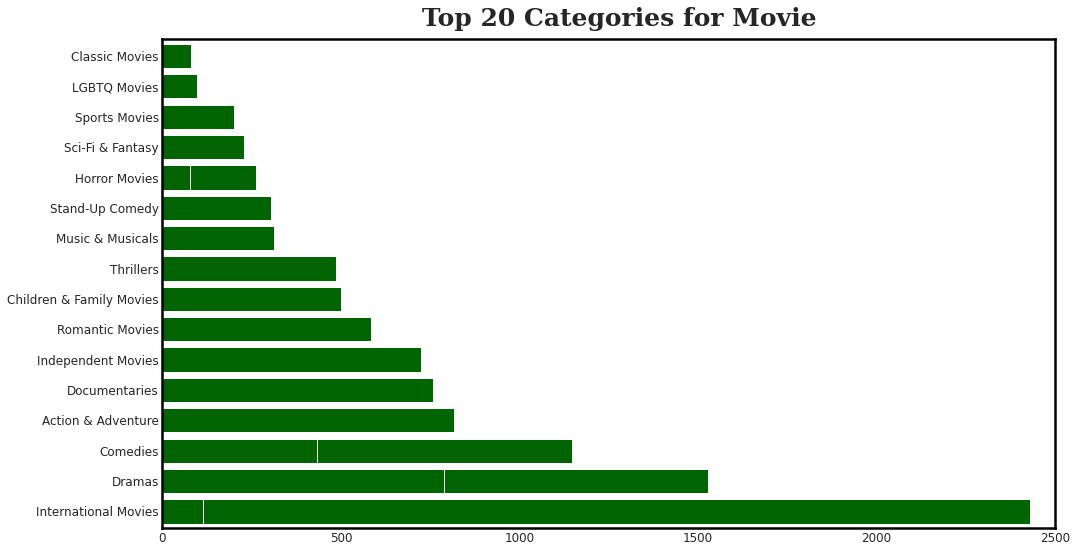

In [ ]:
# Horizontal bar plot of Top 20 Categories for Movies Netflix

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)

# Horizontal bar plot

ax.barh(names_mov, val_mov, color='darkgreen', alpha = 1, label='Movie')

# Title label

fig.text(0.35, 0.9, 'Top 20 Categories for Movie', fontsize = 25, fontweight='bold', fontfamily='serif')   

# Axis display settings

ax.set_facecolor("white")
ax.set_xlim(0,2500)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.grid(False)
ax.margins(x=0, y = .01)


# Plot boundaries around the plot

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_linewidth(2.5)
    ax.spines[s].set_color("black")

plt.show()

In [ ]:
#Top 20 Categories for TV SHow
categories_tv = ','.join(tv_df['listed_in']).split(",")
counter_list = Counter(categories_tv).most_common(20)
names_tv = [i[0].strip() for i in counter_list]
val_tv = [i[1] for i in counter_list]


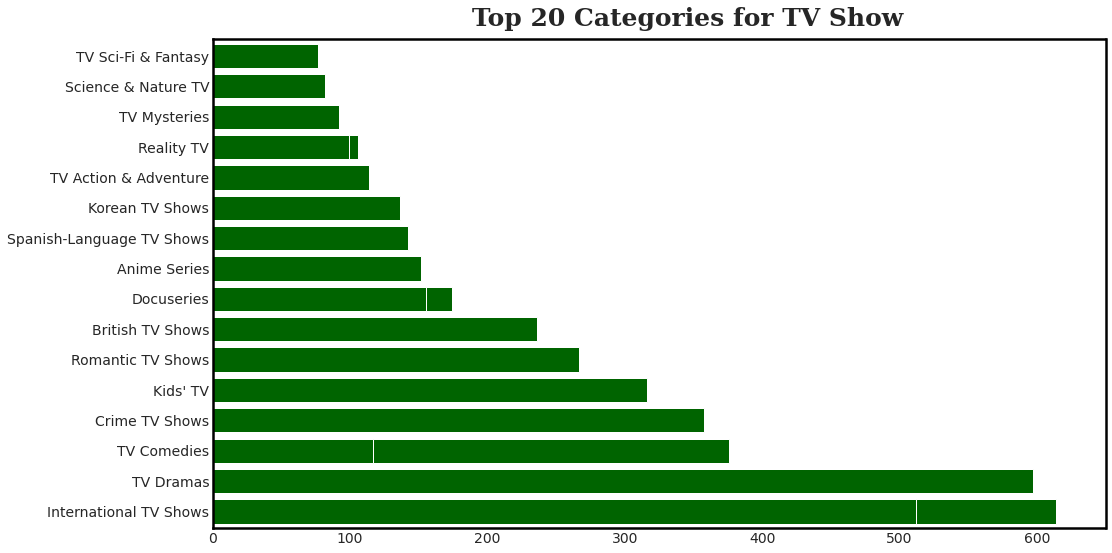

In [ ]:
# Horizontal bar plot of Top 20 Categories for TV Shows

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)

# Horizontal bar plot

ax.barh(names_tv, val_tv, color='darkgreen', alpha = 1, label='Movie')

# Title label

fig.text(0.35, 0.9, 'Top 20 Categories for TV Show', fontsize = 25, fontweight='bold', fontfamily='serif')   

# Axis display settings

ax.set_facecolor("white")
ax.set_xlim(0,650)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.grid(False)
ax.margins(x=0, y = .01)

# Plot boundaries around the plot

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_linewidth(2.5)
    ax.spines[s].set_color("black")

plt.show()

# **Observations**
* We observe that for both Movies and TV Shows the **top 3 ranked categories are :**
1. **International TV Show / Movies**
2. **Dramas**
3. **Comedies**



# **Analysis of median time duration for Movie over the years**

In [ ]:
# Median duration of movies over the years.
movie_duration_over_year = movie_df.groupby(by = 'release_year')['duration'].median().astype('int')
print("The year {} has maxmimum median duration of {} mins.".format(movie_duration_over_year.idxmax(), movie_duration_over_year.max()))

The year 1964 has maxmimum median duration of 200 mins.


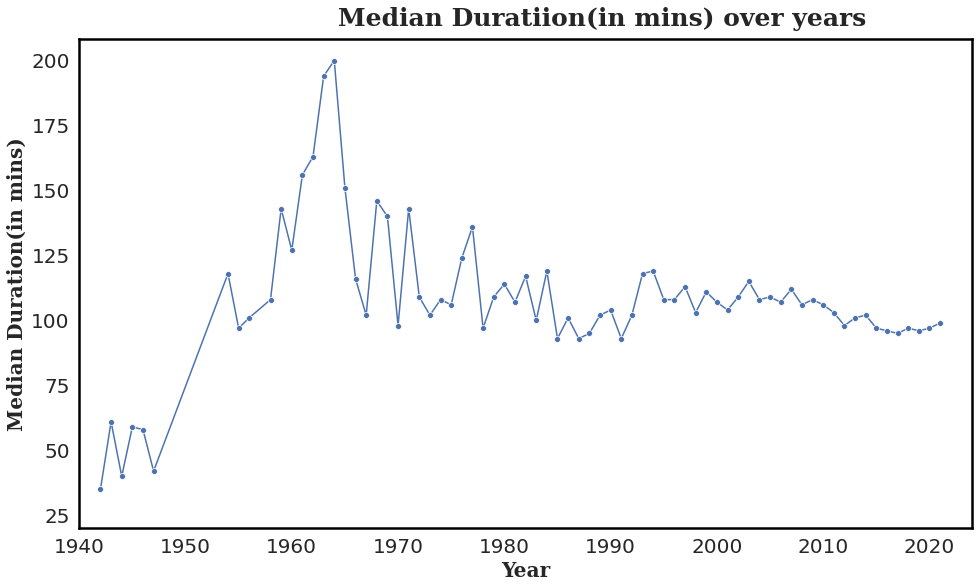

In [ ]:
# Median duration of Movie over the years.
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)

# Graph style
sns.set(font_scale= 2)
sns.set_style('white')

# Line plot 

sns.lineplot(x = movie_duration_over_year.index, y = movie_duration_over_year.values, data = movie_duration_over_year, marker = "o")
sns.set_style('white')
# Graph labels.

fig.text(0.35, 0.9, 'Median Duratiion(in mins) over years', fontsize = 25, fontweight='bold', fontfamily='serif')
plt.xlabel("Year", fontsize = 20, fontweight='heavy', fontfamily='serif',y=2, x = .5)
plt.ylabel("Median Duration(in mins)", fontsize = 20, fontweight='heavy', fontfamily='serif')

# X and Y limits

ax.set_ylim(bottom = 20)
ax.set_xlim(1940, 2024)

# Plot boundaries around the plot

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_linewidth(2.5)
    ax.spines[s].set_color("black")

  
ax.tick_params(axis='both', which='major', labelsize = 20)

plt.show()

#**Obeservation:**
* The year 1964 has maxmimum median duration of 200 mins.
* During 2000s the median movie duration is between **100 to 125 mins** , from 1940s to 1950s the duration used to be **30 to 50 mins** as it just the starting of movie making as the years have passed audince prefers movies of less than **2 hours**.


#**Top Actors and Directors for Movies and TV Shows for top countries**
* For **Movie the top two counties are USA ans IN (India)**
* For **Movie the top two counties are USA ans UK**

In [ ]:
movie_df[movie_df['director'] != 'No Data']['country'].value_counts().head(2)

USA    2299
IN      915
Name: country, dtype: int64

In [ ]:
movie_usa = movie_df[(movie_df['country'] == 'USA') & (movie_df['cast'] != 'No Data')].reset_index(drop = True)
movie_usa.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month(number)_added,month(name)_added,year_added
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",USA,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,September,2021
1,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",USA,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9,September,2021
2,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",USA,2021-09-20,2010,PG-13,103,Comedies,Mourning the loss of their beloved junior high...,9,September,2021
3,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",USA,2021-09-19,2013,PG-13,97,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,9,September,2021
4,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...",USA,2021-09-19,2013,PG-13,106,Thrillers,"Blackmailed by his company's CEO, a low-level ...",9,September,2021


In [ ]:
movie_india = movie_df[(movie_df['country'] == 'IN') & (movie_df['cast'] != 'No Data')].reset_index(drop = True)
movie_india.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month(number)_added,month(name)_added,year_added
0,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",IN,2021-09-21,1998,TV-14,166,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,9,September,2021
1,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",IN,2021-09-05,2017,TV-14,128,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...,9,September,2021
2,s115,Movie,Anjaam,Rahul Rawail,"Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Jo...",IN,2021-09-02,1994,TV-14,143,"Dramas, International Movies, Thrillers",A wealthy industrialist’s dangerous obsession ...,9,September,2021
3,s117,Movie,Dhanak,Nagesh Kukunoor,"Krrish Chhabria, Hetal Gada, Vipin Sharma, Gul...",IN,2021-09-02,2015,TV-PG,114,"Comedies, Dramas, Independent Movies",A movie-loving 10-year-old and her blind littl...,9,September,2021
4,s119,Movie,Gurgaon,Shanker Raman,"Akshay Oberoi, Pankaj Tripathi, Ragini Khanna,...",IN,2021-09-02,2017,TV-14,106,"Dramas, International Movies, Thrillers",When the daughter of a wealthy family returns ...,9,September,2021


In [ ]:
# List of top 15 Movie actors for USA and India.
usa_actors =  ','.join(movie_usa['cast']).split(",")
counter_list = Counter(usa_actors).most_common(15)
names_usa_actors = [i[0].strip() for i in counter_list]
val_usa_actors = [i[1] for i in counter_list]

india_actors =  ','.join(movie_india['cast']).split(",")
counter_list_1 = Counter(india_actors).most_common(15)
names_india_actors = [i[0].strip() for i in counter_list_1]
val_india_actors = [i[1] for i in counter_list_1]
type(val_usa_actors[0])

int

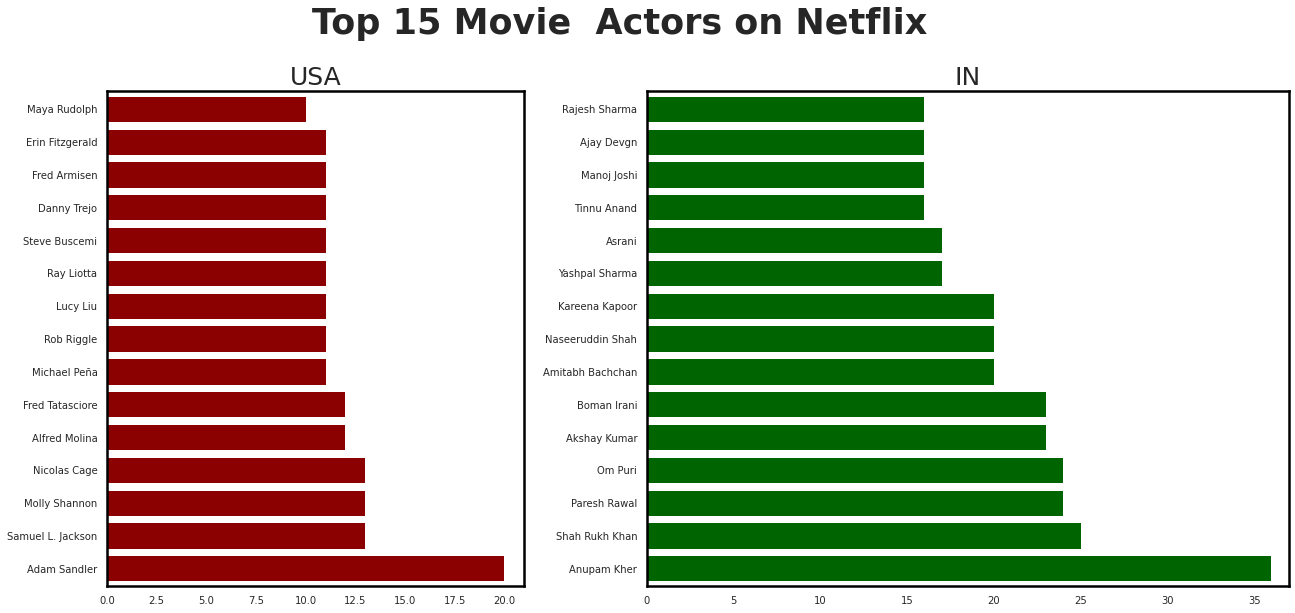

In [ ]:
# Subplots Top 15 Movie Actors on Netflix

# Subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9), gridspec_kw={'width_ratios': [1.3, 2]})
fig.tight_layout(h_pad=2, w_pad = 2.5)

# Title of graph
fig.suptitle('Top 15 Movie  Actors on Netflix', size = 35, weight = 'bold', x = .45)

plt.subplots_adjust(top=0.85)

# Subplots title and limits of axes.

ax1.barh(names_usa_actors, val_usa_actors, color='darkred', alpha = 1)
ax1.set_title("USA", size = 25)
ax1.set_xlim([0, 21])
ax2.barh(names_india_actors, val_india_actors, color='darkgreen', alpha = 1)
ax2.set_title("IN", size = 25)
ax2.set_xlim([0, 37])


# Tick parameters and display settings.

for i in [ax1, ax2]:
  i.grid(False)
  i.tick_params(labelsize= 10)
  i.set_facecolor('white')
  i.set(ymargin = 0.01)
  i.spines['left'].set_visible(True)

# Boundries around each subplot.

for s in ['top', 'left', 'right', 'bottom']:
    for i in [ax1, ax2]:
      i.spines[s].set_linewidth(2.5)
      i.spines[s].set_color("black")
plt.show()

In [ ]:
# List of top 15 Movie director for USA and India.

# DataFrame for Movie director for USA and India.

movie_usa_director = movie_usa[movie_usa['director'] != 'No Data']
movie_india_director = movie_india[movie_india['director'] != 'No Data']

# List of top 15 Movie director for USA.

usa_director =  ','.join(movie_usa_director['director']).split(",")
counter_list_5 = Counter(usa_director).most_common(15)
names_usa_directors = [i[0].strip() for i in counter_list_5]
val_usa_directors = [i[1] for i in counter_list_5]

# List of top 15 Movie director for India.

india_director =  ','.join(movie_india_director['director']).split(",")
counter_list_6 = Counter(india_director).most_common(15)
names_india_directors = [i[0].strip() for i in counter_list_6]
val_india_directors = [i[1] for i in counter_list_6]


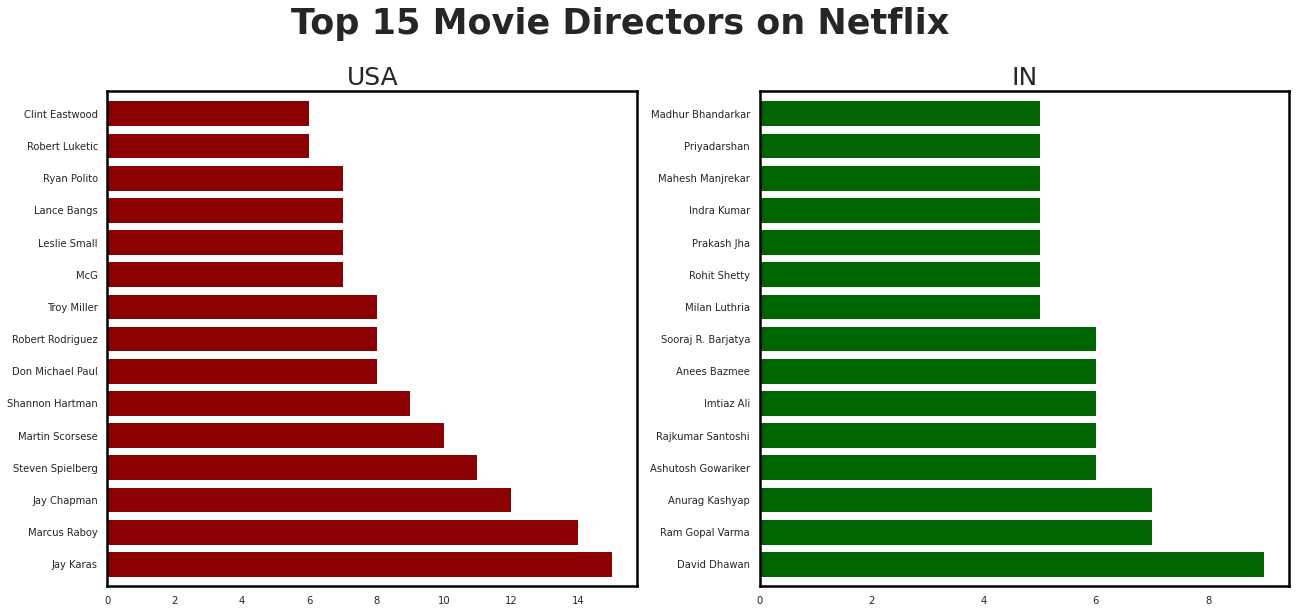

In [ ]:
# Subplots Top 15 Directors on Netflix

# Subplot

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9), gridspec_kw={'width_ratios': [2, 2]})
fig.tight_layout(h_pad=2, w_pad = 2.5)

# Title of graph

fig.suptitle('Top 15 Movie Directors on Netflix', size = 35, weight = 'bold', x = .45)
plt.subplots_adjust(top=0.85)

# Subplots title and limits of axes

ax1.barh(names_usa_directors, val_usa_directors, color='darkred', alpha = 1)
ax1.set_title("USA", size = 25)


ax2.barh(names_india_directors, val_india_directors, color='darkgreen', alpha = 1)
ax2.set_title("IN", size = 25)


# Tick parameters and display settings.

for i in [ax1, ax2]:
  i.grid(False)
  i.tick_params(labelsize= 10)
  i.set_facecolor('white')
  i.set(ymargin = 0.02)
  i.spines['left'].set_visible(True)

# Boundries around each subplot.

for s in ['top', 'left', 'right', 'bottom']:
    for i in [ax1, ax2]:
      i.spines[s].set_linewidth(2.5)
      i.spines[s].set_color("black")
plt.show()

In [ ]:
tv_df['country'].value_counts().head(2)

USA    841
UK     245
Name: country, dtype: int64

In [ ]:
# List of top 15 TV Actors for USA and UK.

# DataFrame for top 15 TV Actors  for USA and UK.

tv_show_usa = tv_df[(tv_df['country'] == 'USA') & (tv_df['cast'] != 'No Data')].reset_index(drop = True)
tv_show_uk = tv_df[(tv_df['country'] == 'UK') & (tv_df['cast'] != 'No Data')].reset_index(drop = True)

# List of top 15 TV Actors for USA.

usa_tv_actors =  ','.join(tv_show_usa['cast']).split(",")
counter_list_3 = Counter(usa_tv_actors).most_common(15)
tv_names_usa_actors = [i[0].strip() for i in counter_list_3]
tv_val_usa_actors = [i[1] for i in counter_list_3]

# List of top 15 TV Actors for UK.

uk_tv_actors =  ','.join(tv_show_uk['cast']).split(",")
counter_list_4 = Counter(uk_tv_actors).most_common(15)
tv_names_uk_actors = [i[0].strip() for i in counter_list_4]
tv_val_uk_actors = [i[1] for i in counter_list_4]

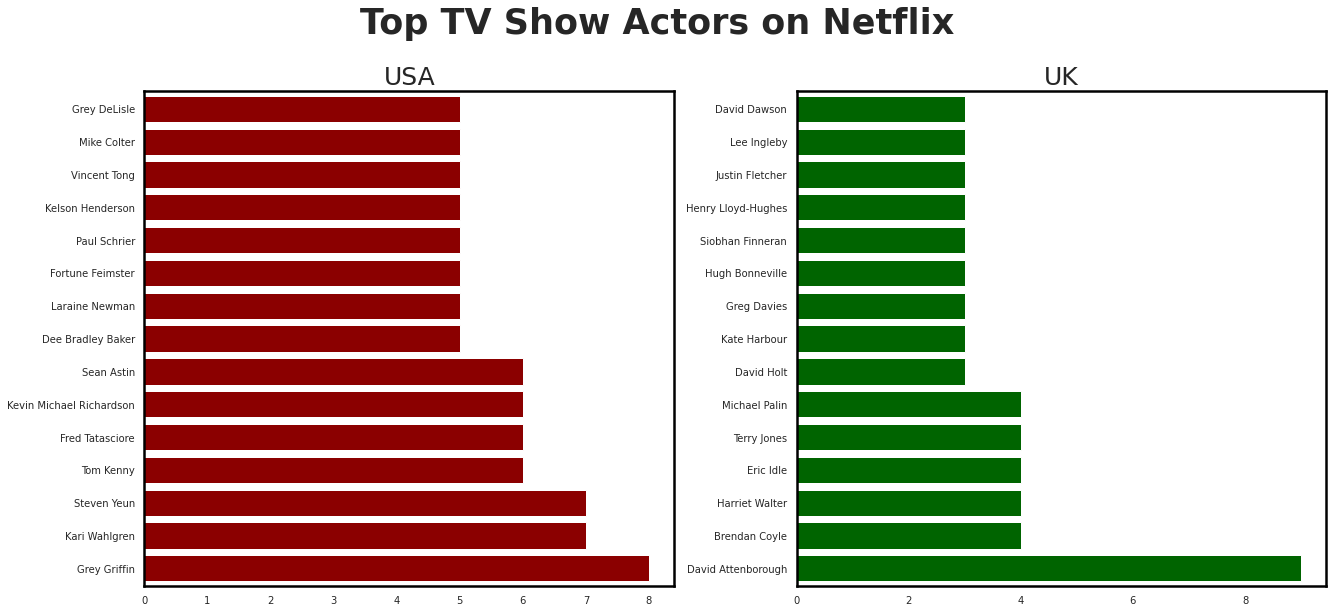

In [ ]:
# Subplots top 15 TV Actorss on Netflix


# Subplot

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
fig.tight_layout(h_pad=2, w_pad = 2.5)

# Title of graph

fig.suptitle('Top 15 TV Show Actors on Netflix', size = 35, weight = 'bold', x = .45)
plt.subplots_adjust(top=0.85)

# Subplots title and limits of axes

ax1.barh(tv_names_usa_actors, tv_val_usa_actors, color='darkred', alpha = 1)
ax1.set_title("USA", size = 25)

ax2.barh(tv_names_uk_actors, tv_val_uk_actors, color='darkgreen', alpha = 1)
ax2.set_title("UK", size = 25)

# Tick parameters and display settings.

for i in [ax1, ax2]:
  i.grid(False)
  i.tick_params(labelsize= 10)
  i.set_facecolor('white')
  i.set(ymargin = 0.01)
  i.spines['left'].set_visible(True)

# Boundries around each subplot.
 
for s in ['top', 'left', 'right', 'bottom']:
    for i in [ax1, ax2]:
      i.spines[s].set_linewidth(2.5)
      i.spines[s].set_color("black")
plt.show()

# **Observations**
* The horizontal bar plot above gives us the top actors and directors for Movie also top actors for TV Shows.

# **Distribution of Count of Directors and Cast Members**

In [ ]:
df['Count of Directors'] = df['director'].apply(number_of_directors_or_cast)
df['Number of Cast Members'] = df['cast'].apply(number_of_directors_or_cast)


In [ ]:
freq_dire = df['Count of Directors'].value_counts()
freq_dire.sort_index()
freq_dire.loc[6] = 0
freq_dire = freq_dire.sort_index().to_frame()
freq_dire.rename(columns = {"Count of Directors" : "Count"}, inplace = True)
freq_dire

,Count
0,2214
1,5176
2,504
3,33
4,15
5,6
6,0
7,2
8,1
9,2


In [ ]:
# Dataframe of frequency of directors.

freq_dire = freq_dire[3:]
freq_dire

,Count
3,33
4,15
5,6
6,0
7,2
8,1
9,2
10,3
11,2
12,2


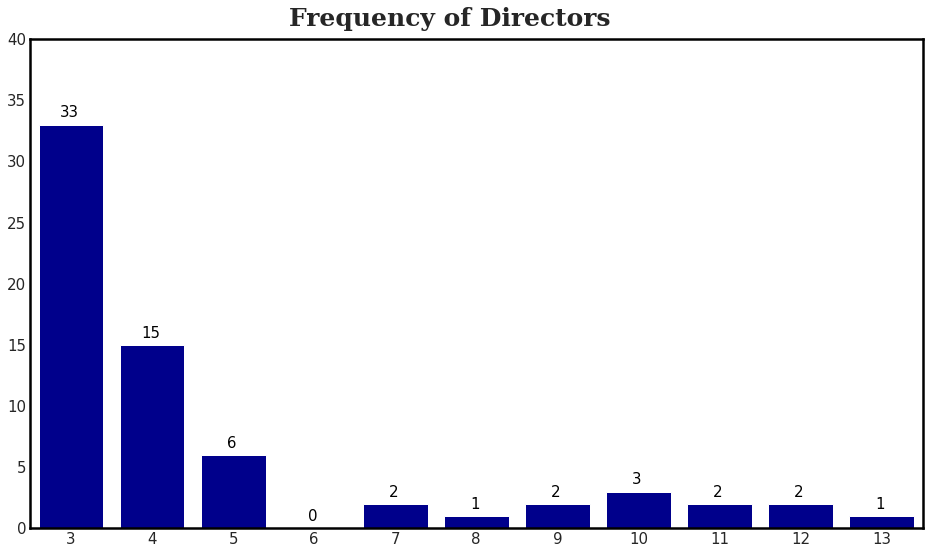

In [ ]:
# Distribution of frequency of directors.

ig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)

# Bar graph of frequency of directors.

ax.bar(freq_dire.index, freq_dire['Count'], color='darkblue', alpha = 1, label='Movie')

# Figure text 

fig.text(0.35, 0.9, 'Frequency of Directors', fontsize = 25, fontweight='bold', fontfamily='serif')   

ax.set_facecolor("white")

# Tick parameters and display settings.

ax.set_ylim(0,40)
ax.tick_params(axis=u'both', which=u'both',length=0, labelsize=15)
grid_x_ticks = np.arange(3, 14, 1) # y ticks, min, max, then step
ax.set_xticks(grid_x_ticks)
ax.margins(x=.01, y = 0.01)

# Boundries around plot.

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_linewidth(2.5)
    ax.spines[s].set_color("black")
    ax.grid(False)

# Annotations of the graph.

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+.38, p.get_height() + 3), ha='center', va='top', color='black', size = 15)
plt.show()

In [ ]:
# Dataframe of frequency of cast memnbers.
freq_cast = df['Number of Cast Members'].value_counts().sort_index(ascending = False).to_frame().reset_index().rename(columns = {'index' : 'Number of Cast Members', 'Number of Cast Members' : "Count"})
freq_cast = freq_cast[(freq_cast['Number of Cast Members'] != 0) & (freq_cast['Count'] > 30)]
freq_cast

,Number of Cast Members,Count
26,18,33
27,17,43
28,16,70
29,15,110
30,14,117
31,13,165
32,12,280
33,11,447
34,10,1349
35,9,631


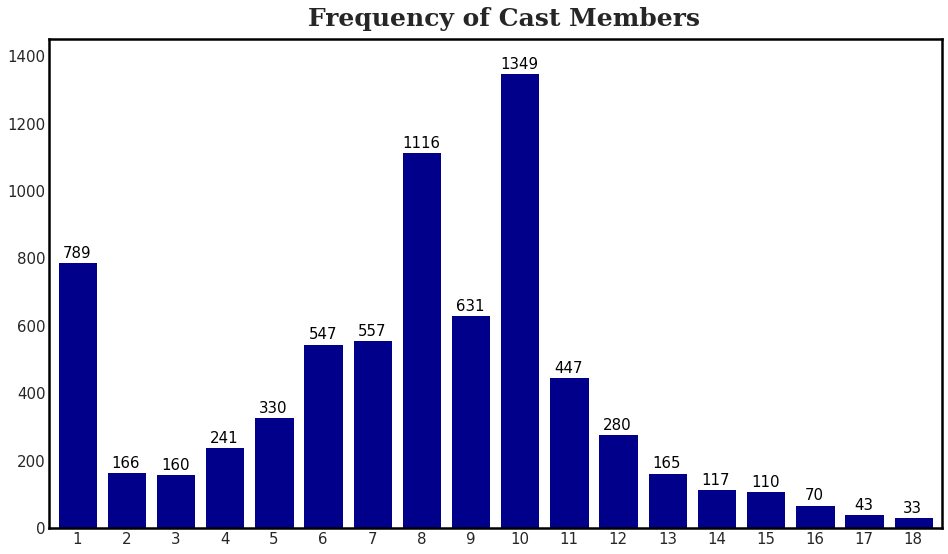

In [ ]:
# Distribution of frequency of cast members.

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)

# Bar graph of frequency of cast members.

ax.bar(freq_cast['Number of Cast Members'], freq_cast['Count'], 
        color='darkblue', alpha = 1, label='Movie')

# Figure text 

fig.text(0.35, 0.9, 'Frequency of Cast Members', fontsize = 25, fontweight='bold', fontfamily='serif')   
ax.set_facecolor("white")

# Tick parameters and display settings.

ax.set_ylim(0,1450)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis=u'both', which=u'both',length=0)
grid_x_ticks = np.arange(1, 19, 1) # y ticks, min, max, then step
ax.set_xticks(grid_x_ticks)

# Annotations of the graph.

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+.39, p.get_height() + 100), ha='center', va='top', color='black', size = 15)
ax.margins(x=0.01, y = 0)

# Boundries around plot.

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_linewidth(2.5)
    ax.spines[s].set_color("black")
    ax.grid(False)
plt.show()

# **Observations**
* Frequency of directors : Most Movie and TV Show have one or two directors. The maximum number of directors is 13.
* Frequency of Cast Members : Most Movie and TV Show have 8 or 10 cast members.

# **Common movie title words for Movies in USA, India and Spain**

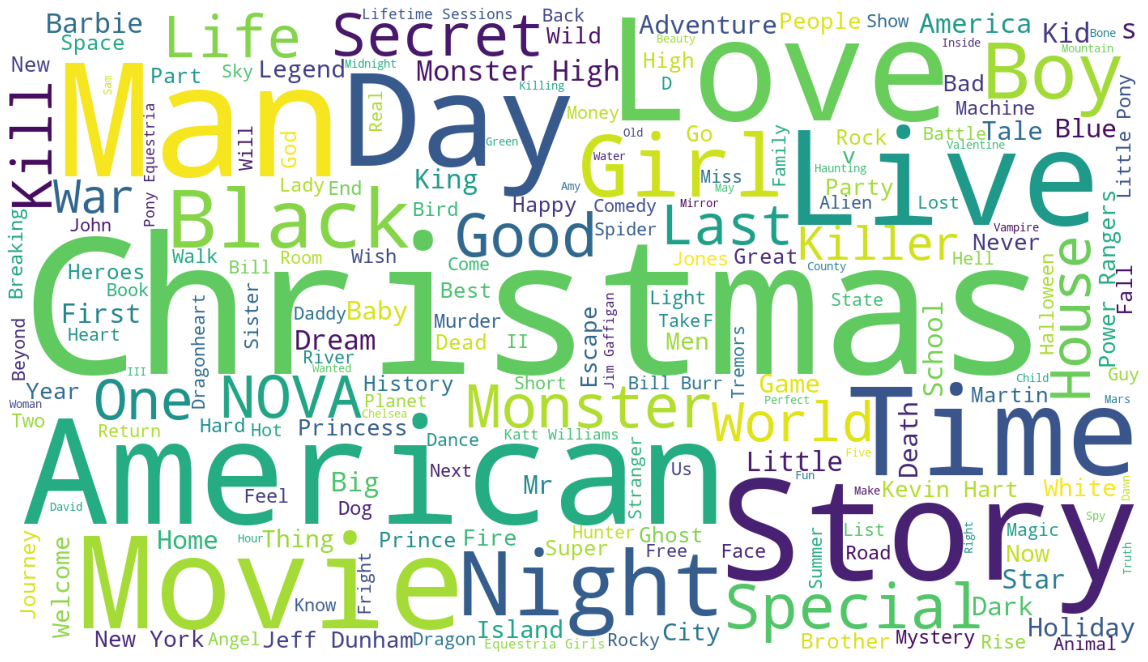

In [ ]:
# Wordcloud for Movies in USA
text = ' '.join(movie_usa['title'])
wordcloud = WordCloud(width = 1400, height = 800, 
            background_color ='white', 
            stopwords = STOPWORDS, 
            min_font_size = 10).generate(text) 

# plot the WordCloud image                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

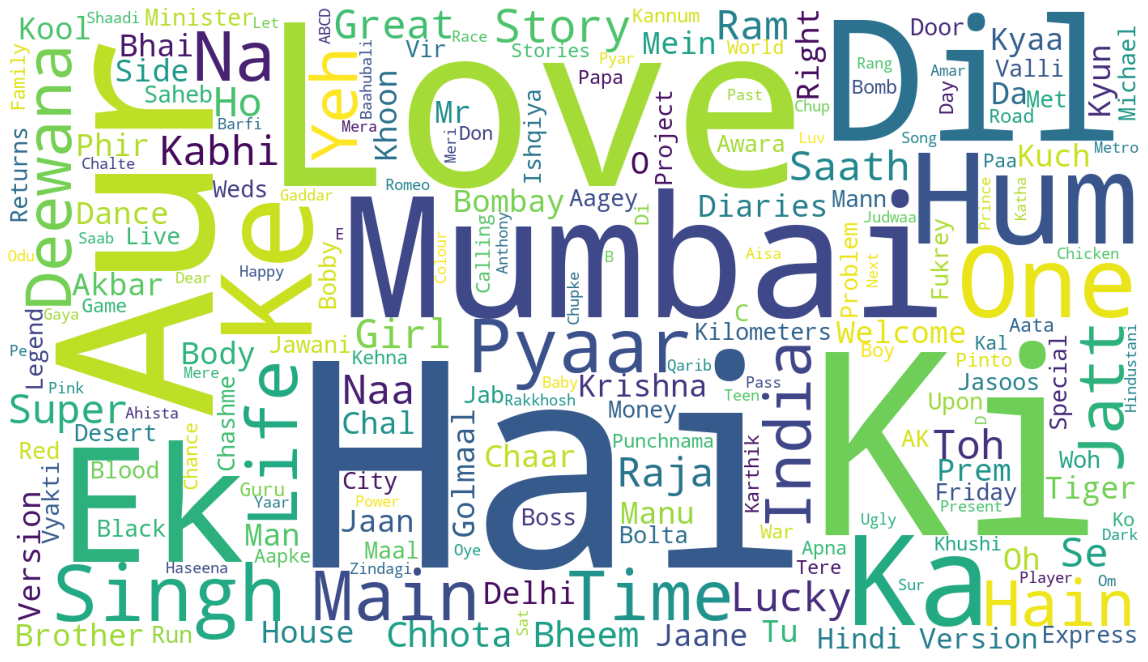

In [ ]:
# Wordcloud for movie title in India
text_2 = ' '.join(movie_india['title'])
wordcloud = WordCloud(width = 1400, height = 800, 
            background_color ='white', 
            stopwords = STOPWORDS, 
            min_font_size = 10).generate(text_2) 

# plot the WordCloud image                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

*

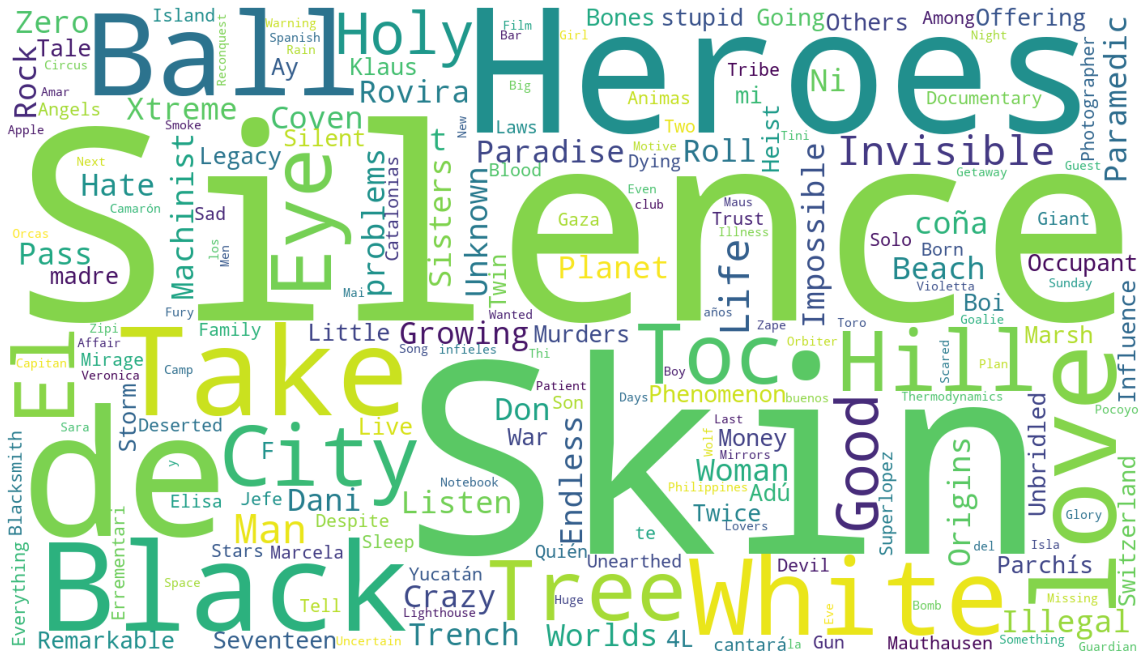

In [ ]:
# Wordcloud for movie title in Spain

text_3 = ' '.join(df[(df['country'] == 'Spain') & (df['type'] == 'Movie')].title)
wordcloud = WordCloud(width = 1400, height = 800, 
            background_color ='white', 
            stopwords = STOPWORDS, 
            min_font_size = 10).generate(text_3) 

# plot the WordCloud image                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

# **Observations**
1. USA : Common words for movie titles are **Christmas, American, Story and so on.**
2. India: Common words for movie titles are **mostly Hindi words**
3. Spain: Common words for movie titles are **mostly Spanish words**

# **Common description words for Movies and TV Shows on Netflix**

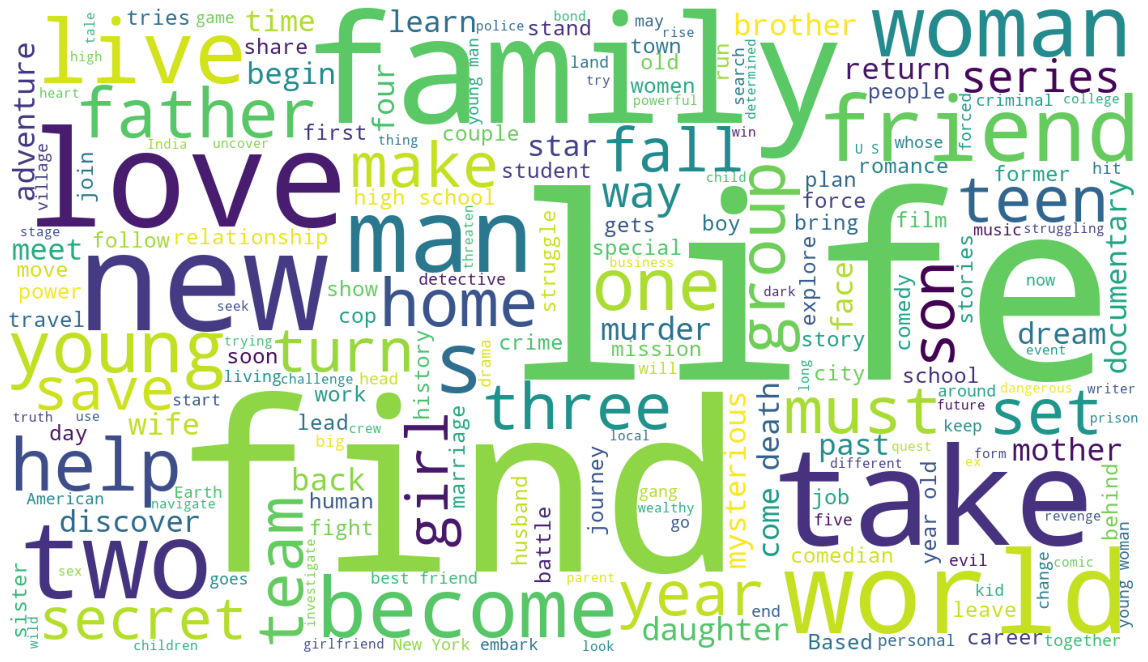

In [ ]:
# WordCloud for description words for Movies and TV Shows on Netflix.,
text_4 = ' '.join(df.description)
wordcloud = WordCloud(width = 1400, height = 800, 
            background_color ='white', 
            stopwords = STOPWORDS, 
            min_font_size = 10).generate(text_4) 

# plot the WordCloud image                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

# **Observations**
* The commin words found in description are mostly neutral and postive words.